In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
# data sur la DVF
df = pd.read_csv('./data/dvf_compiegne.csv',delimiter=';')
df = df[['nature_mutation', 'valeur_fonciere', 'date_mutation', 'type_local', 'nombre_pieces_principales', 'surface_reelle_bati', 'code_departement']]

chomage = pd.read_excel('./data/chomage.xlsx')
chomage = chomage.drop(df.index[:4])
chomage.rename(columns={'Observatoire des territoires - ANCT': 'Code'}, inplace=True)
chomage.rename(columns={'Unnamed: 1': 'Departements'}, inplace=True)
chomage['Departements'] = chomage['Departements'].drop(chomage.index[-1])
chomage.rename(columns={'Unnamed: 2': 'Année'}, inplace=True)
chomage.rename(columns={'Unnamed: 3': 'Taux de chômage'}, inplace=True)


logement = pd.read_excel('./data/logement_sociaux_2022.xlsx', sheet_name='DEP', engine='openpyxl')
new_column_names = {'Logements sociaux au 1er janvier 2022 : comparaisons départementales': 'Code',
                    'Unnamed: 1': 'Départements', 'Unnamed: 2': 'Nbre de logements pour 10 000 habitants', 'Unnamed: 5': 'Loyer moyen par m²'}
columns_to_drop = ['Unnamed: 3', 'Unnamed: 4']

# Utilisez la méthode drop() pour supprimer les colonnes
logement = logement.drop(columns=columns_to_drop)

# Utilisez la méthode rename() pour remplacer les noms de colonnes
logement = logement.rename(columns=new_column_names)


#affiche le nombre de lignes et de colonnes
print('DVF : ', df.shape)
print('Chômage : ', chomage.shape)
print('Logement : ', logement.shape)

DVF :  (364, 7)
Chômage :  (101, 4)
Logement :  (109, 4)


In [3]:
logement = logement.iloc[:-2]

In [4]:
# vérifie le nombre de duplica
df.duplicated().sum()
chomage.duplicated().sum()
logement.duplicated().sum()

# supprime les duplicas
df = df.drop_duplicates()
chomage = chomage.drop_duplicates()
logement = logement.drop_duplicates()

print('DVF update: ', df.shape)
print('Chômage update: ', chomage.shape)
print('Logement update: ', logement.shape)

DVF update:  (297, 7)
Chômage update:  (101, 4)
Logement update:  (106, 4)


In [5]:
print('DVF check values null :', df.isnull().sum())
print('--------------------------')
print('Chômage check values null :', chomage.isnull().sum())
print('--------------------------')
print('Logement check values null :', logement.isnull().sum())

DVF check values null : nature_mutation                0
valeur_fonciere                0
date_mutation                  0
type_local                     0
nombre_pieces_principales     16
surface_reelle_bati          106
code_departement               0
dtype: int64
--------------------------
Chômage check values null : Code               0
Departements       1
Année              0
Taux de chômage    1
dtype: int64
--------------------------
Logement check values null : Code                                       2
Départements                               2
Nbre de logements pour 10 000 habitants    1
Loyer moyen par m²                         1
dtype: int64


In [6]:
# suppression des lignes ou ils manquent des valeurs NAN ou NULL
df = df.dropna()
df

,nature_mutation,valeur_fonciere,date_mutation,type_local,nombre_pieces_principales,surface_reelle_bati,code_departement
0,Vente,89000.0,2022-11-24,Appartement,1.0,29.0,60
3,Vente,220000.0,2022-10-24,Appartement,4.0,72.0,60
6,Vente,225000.0,2022-10-21,Appartement,3.0,70.0,60
10,Vente,245000.0,2022-10-12,Local industriel. commercial ou assimilé,0.0,89.0,60
11,Vente,644000.0,2022-09-30,Maison,7.0,157.0,60
...,...,...,...,...,...,...,...
354,Vente,140000.0,2018-03-12,Appartement,2.0,51.0,60
355,Vente,143000.0,2018-03-01,Appartement,3.0,78.0,60
358,Vente,111000.0,2018-02-20,Appartement,2.0,39.0,60
360,Vente,97000.0,2018-02-16,Appartement,2.0,44.0,60


In [7]:
chomage = chomage.dropna()
chomage

,Code,Departements,Année,Taux de chômage
4,01,Ain,2022,5.4
5,02,Aisne,2022,10.5
6,03,Allier,2022,7.6
7,04,Alpes-de-Haute-Provence,2022,8.2
8,05,Hautes-Alpes,2022,7
...,...,...,...,...
99,95,Val-d'Oise,2022,8.1
100,971,Guadeloupe,2022,18.1
101,972,Martinique,2022,12.3
102,973,Guyane,2022,15.4


In [8]:
logement = logement.dropna()
logement

,Code,Départements,Nbre de logements pour 10 000 habitants,Loyer moyen par m²
3,01,Ain,725,5.96
4,02,Aisne,782,5.39
5,03,Allier,602,5.24
6,04,Alpes-de-Haute-Provence,458,5.89
7,05,Hautes-Alpes,568,5.37
...,...,...,...,...
102,972,Martinique,982,5.72
103,973,Guyane,690,6.44
104,974,La Réunion,929,6.22
105,976,Mayotte,84,8.76


In [9]:
df.describe()

,valeur_fonciere,nombre_pieces_principales,surface_reelle_bati,code_departement
count,191.000000,191.000000,191.000000,191.0
mean,259813.895288,3.198953,86.832461,60.0
std,161594.005048,2.108179,81.298172,0.0
min,1.000000,0.000000,12.000000,60.0
25%,143050.000000,2.000000,48.000000,60.0
50%,210000.000000,3.000000,72.000000,60.0
75%,360000.000000,4.000000,101.000000,60.0
max,786000.000000,12.000000,940.000000,60.0


In [10]:
chomage.describe()

,Code,Departements,Année,Taux de chômage
count,100,100,100,100.0
unique,100,100,1,48.0
top,01,Ain,2022,7.0
freq,1,1,100,8.0


In [11]:
logement.describe()

,Code,Départements,Nbre de logements pour 10 000 habitants,Loyer moyen par m²
count,104,104,104,104.00
unique,104,104,95,81.00
top,01,Ain,676,5.23
freq,1,1,2,3.00


In [12]:
df.dtypes

nature_mutation               object
valeur_fonciere              float64
date_mutation                 object
type_local                    object
nombre_pieces_principales    float64
surface_reelle_bati          float64
code_departement               int64
dtype: object

In [13]:
chomage.dtypes

Code               object
Departements       object
Année              object
Taux de chômage    object
dtype: object

In [14]:
logement.dtypes

Code                                       object
Départements                               object
Nbre de logements pour 10 000 habitants    object
Loyer moyen par m²                         object
dtype: object

In [15]:
# Convertir 'date_mutation' en année
df['annee'] = pd.to_datetime(df['date_mutation']).dt.year

# Convertir 'Année' en entier
chomage['Année'] = chomage['Année'].astype(int)

# Assurez-vous que 'code_departement' est de type string dans les deux DataFrames
df['code_departement'] = df['code_departement'].astype(str)
chomage.rename(columns={'Code':'code_departement'}, inplace=True)
chomage['code_departement'] = chomage['code_departement'].astype(str)

# Filtrer le dataframe 'chomage' pour ne garder que le département 60
chomage = chomage[chomage['code_departement'] == '60']

# Fusionnez les deux jeux de données sur la base de l'année et du code de département
df = pd.merge(df, chomage, how='left', left_on=['code_departement', 'annee'], right_on=['code_departement', 'Année'])

# Supprimez la colonne 'Année' car elle est en double avec 'annee'
df.drop(columns='Année', inplace=True)
df

,nature_mutation,valeur_fonciere,date_mutation,type_local,nombre_pieces_principales,surface_reelle_bati,code_departement,annee,Departements,Taux de chômage
0,Vente,89000.0,2022-11-24,Appartement,1.0,29.0,60,2022,Oise,7.3
1,Vente,220000.0,2022-10-24,Appartement,4.0,72.0,60,2022,Oise,7.3
2,Vente,225000.0,2022-10-21,Appartement,3.0,70.0,60,2022,Oise,7.3
3,Vente,245000.0,2022-10-12,Local industriel. commercial ou assimilé,0.0,89.0,60,2022,Oise,7.3
4,Vente,644000.0,2022-09-30,Maison,7.0,157.0,60,2022,Oise,7.3
...,...,...,...,...,...,...,...,...,...,...
186,Vente,140000.0,2018-03-12,Appartement,2.0,51.0,60,2018,NaN,NaN
187,Vente,143000.0,2018-03-01,Appartement,3.0,78.0,60,2018,NaN,NaN
188,Vente,111000.0,2018-02-20,Appartement,2.0,39.0,60,2018,NaN,NaN
189,Vente,97000.0,2018-02-16,Appartement,2.0,44.0,60,2018,NaN,NaN


In [16]:
df['Departements'] = df['Departements'].fillna('Oise')
df['Taux de chômage'] = df['Taux de chômage'].fillna(7.3)

df

,nature_mutation,valeur_fonciere,date_mutation,type_local,nombre_pieces_principales,surface_reelle_bati,code_departement,annee,Departements,Taux de chômage
0,Vente,89000.0,2022-11-24,Appartement,1.0,29.0,60,2022,Oise,7.3
1,Vente,220000.0,2022-10-24,Appartement,4.0,72.0,60,2022,Oise,7.3
2,Vente,225000.0,2022-10-21,Appartement,3.0,70.0,60,2022,Oise,7.3
3,Vente,245000.0,2022-10-12,Local industriel. commercial ou assimilé,0.0,89.0,60,2022,Oise,7.3
4,Vente,644000.0,2022-09-30,Maison,7.0,157.0,60,2022,Oise,7.3
...,...,...,...,...,...,...,...,...,...,...
186,Vente,140000.0,2018-03-12,Appartement,2.0,51.0,60,2018,Oise,7.3
187,Vente,143000.0,2018-03-01,Appartement,3.0,78.0,60,2018,Oise,7.3
188,Vente,111000.0,2018-02-20,Appartement,2.0,39.0,60,2018,Oise,7.3
189,Vente,97000.0,2018-02-16,Appartement,2.0,44.0,60,2018,Oise,7.3


In [17]:
logement.rename(columns={'Code':'code_departement'}, inplace=True)

# Convertissez 'code_departement' à int dans les deux dataframes, si nécessaire
logement['code_departement'] = logement['code_departement'].astype(str)
df['code_departement'] = df['code_departement'].astype(str)

# Fusionnez les deux dataframes
df = pd.merge(df, logement, how='left', on='code_departement')
df = df.drop(columns=['Départements'])
df

,nature_mutation,valeur_fonciere,date_mutation,type_local,nombre_pieces_principales,surface_reelle_bati,code_departement,annee,Departements,Taux de chômage,Nbre de logements pour 10 000 habitants,Loyer moyen par m²
0,Vente,89000.0,2022-11-24,Appartement,1.0,29.0,60,2022,Oise,7.3,821,5.69
1,Vente,220000.0,2022-10-24,Appartement,4.0,72.0,60,2022,Oise,7.3,821,5.69
2,Vente,225000.0,2022-10-21,Appartement,3.0,70.0,60,2022,Oise,7.3,821,5.69
3,Vente,245000.0,2022-10-12,Local industriel. commercial ou assimilé,0.0,89.0,60,2022,Oise,7.3,821,5.69
4,Vente,644000.0,2022-09-30,Maison,7.0,157.0,60,2022,Oise,7.3,821,5.69
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vente,140000.0,2018-03-12,Appartement,2.0,51.0,60,2018,Oise,7.3,821,5.69
187,Vente,143000.0,2018-03-01,Appartement,3.0,78.0,60,2018,Oise,7.3,821,5.69
188,Vente,111000.0,2018-02-20,Appartement,2.0,39.0,60,2018,Oise,7.3,821,5.69
189,Vente,97000.0,2018-02-16,Appartement,2.0,44.0,60,2018,Oise,7.3,821,5.69


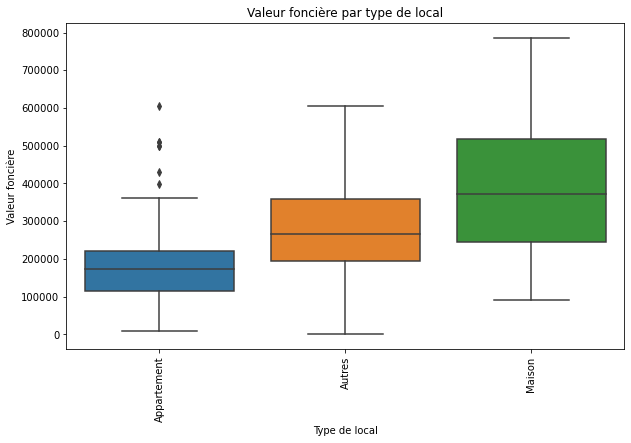

In [18]:
type_local = df['type_local']
type_local.unique()
type_local.value_counts()

type_local = df['type_local'].replace(['Local industriel. commercial ou assimilé'], 'Autres')


plt.figure(figsize=(10,6))
sns.boxplot(x=type_local, y='valeur_fonciere', data=df)
plt.title('Valeur foncière par type de local')
plt.xlabel('Type de local')
plt.ylabel('Valeur foncière')
plt.xticks(rotation=90)  # Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.show()
# ax = fig.add_subplot(1,2,2)
# sns.lineplot(x=top10_cars.index,y=top10_mean_prices)
# plt.xticks(rotation = 45)
# plt.ylabel('Average Price')
# plt.title('Top10 The Average Price')

In [19]:
nature_mutation = df['nature_mutation']
nature_mutation.unique()
nature_mutation.value_counts()


Vente      189
Echange      2
Name: nature_mutation, dtype: int64

Ici nous remarquons que la catégorie ("Vente") est largement plus fréquente que l'autre ("Echange"), cela donc ne sert à rien de faire un graphique qui n'est pas très informatif.

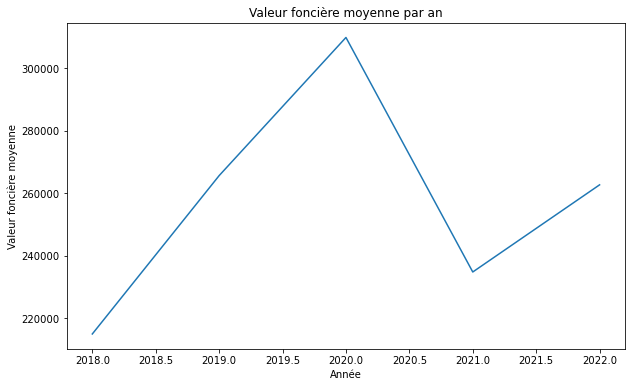

In [20]:
# Grouper par 'annee' et calculer la moyenne de 'valeur_fonciere'
df_annual = df.groupby('annee').mean()

plt.figure(figsize=(10,6))
plt.plot(df_annual.index, df_annual['valeur_fonciere'])
plt.title('Valeur foncière moyenne par an')
plt.xlabel('Année')
plt.ylabel('Valeur foncière moyenne')
plt.show()

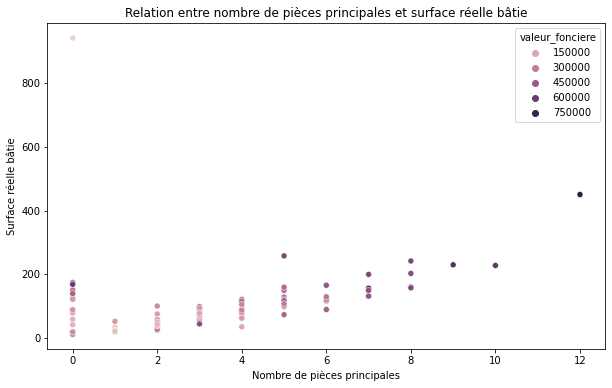

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='nombre_pieces_principales', y='surface_reelle_bati', hue='valeur_fonciere')
plt.title('Relation entre nombre de pièces principales et surface réelle bâtie')
plt.xlabel('Nombre de pièces principales')
plt.ylabel('Surface réelle bâtie')
plt.show()

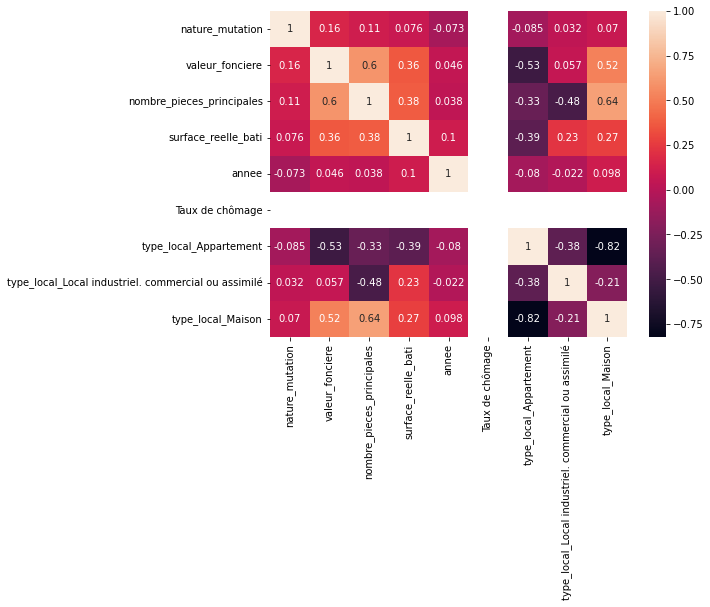

In [22]:
df['nature_mutation'] = df['nature_mutation'].map({'Vente': 1, 'Echange': 0})
df = pd.get_dummies(df, columns=['type_local'], prefix='type_local')


plt.figure(figsize=(8,6))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [23]:
df['date_mutation'] = pd.to_datetime(df['date_mutation'])
# Maintenant, vous pouvez extraire l'année, le mois, le jour et le jour de la semaine
df['year'] = df['date_mutation'].dt.year
df['month'] = df['date_mutation'].dt.month
df['day'] = df['date_mutation'].dt.day
df['dayofweek'] = df['date_mutation'].dt.dayofweek

df = df.drop(columns='date_mutation')

df

,nature_mutation,valeur_fonciere,nombre_pieces_principales,surface_reelle_bati,code_departement,annee,Departements,Taux de chômage,Nbre de logements pour 10 000 habitants,Loyer moyen par m²,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,type_local_Maison,year,month,day,dayofweek
0,1,89000.0,1.0,29.0,60,2022,Oise,7.3,821,5.69,1,0,0,2022,11,24,3
1,1,220000.0,4.0,72.0,60,2022,Oise,7.3,821,5.69,1,0,0,2022,10,24,0
2,1,225000.0,3.0,70.0,60,2022,Oise,7.3,821,5.69,1,0,0,2022,10,21,4
3,1,245000.0,0.0,89.0,60,2022,Oise,7.3,821,5.69,0,1,0,2022,10,12,2
4,1,644000.0,7.0,157.0,60,2022,Oise,7.3,821,5.69,0,0,1,2022,9,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1,140000.0,2.0,51.0,60,2018,Oise,7.3,821,5.69,1,0,0,2018,3,12,0
187,1,143000.0,3.0,78.0,60,2018,Oise,7.3,821,5.69,1,0,0,2018,3,1,3
188,1,111000.0,2.0,39.0,60,2018,Oise,7.3,821,5.69,1,0,0,2018,2,20,1
189,1,97000.0,2.0,44.0,60,2018,Oise,7.3,821,5.69,1,0,0,2018,2,16,4


In [24]:
from sklearn.model_selection import train_test_split

# Supposons que X soit vos variables d'entrée et y la variable cible
X = df.drop(['valeur_fonciere', 'Departements'], axis=1)
y = df['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [26]:
model.fit(X_train, y_train)

LinearRegression()

RMSE:  100180.63171816542
R2 score:  0.6161614132636838


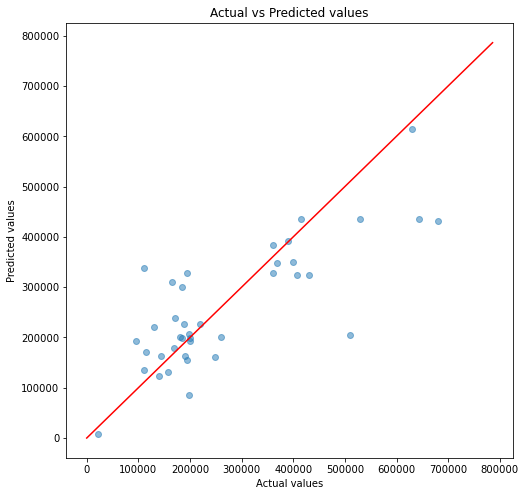

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))
print("R2 score: ", r2)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Line of perfect fit
plt.title('Actual vs Predicted values')
plt.show()

In [28]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                                     Coefficient
nature_mutation                                     8.257324e+04
nombre_pieces_principales                           5.300963e+04
surface_reelle_bati                                -1.208627e+02
code_departement                                   -1.491571e-10
annee                                               7.040973e+02
Taux de chômage                                    -7.275958e-12
Nbre de logements pour 10 000 habitants             0.000000e+00
Loyer moyen par m²                                  1.273293e-10
type_local_Appartement                             -1.073506e+05
type_local_Local industriel. commercial ou assi...  1.620415e+05
type_local_Maison                                  -5.469089e+04
year                                                7.040973e+02
month                                               4.661972e+03
day                                                 1.599486e+03
dayofweek                

In [29]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

RMSE:  104661.06246502271
R2 score:  0.5810604344091901


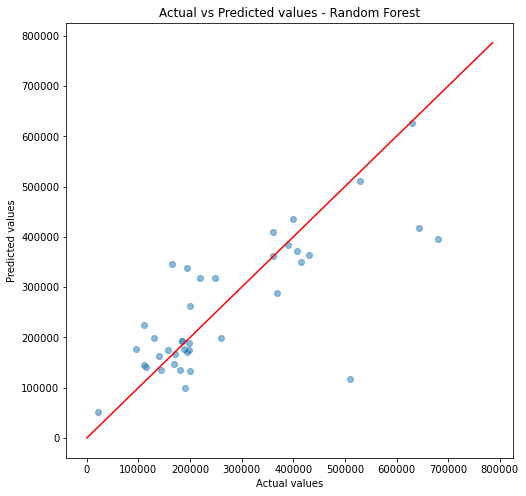

In [31]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))
print("R2 score: ", r2)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Line of perfect fit
plt.title('Actual vs Predicted values - Random Forest')
plt.show()

In [32]:
importance_df = pd.DataFrame(model2.feature_importances_, X.columns, columns=['Importance'])
print(importance_df.sort_values('Importance', ascending=False))

                                                    Importance
surface_reelle_bati                                   0.575019
nombre_pieces_principales                             0.156570
day                                                   0.078453
month                                                 0.062766
dayofweek                                             0.046392
type_local_Appartement                                0.034986
year                                                  0.016702
annee                                                 0.011695
type_local_Maison                                     0.011560
type_local_Local industriel. commercial ou assi...    0.004039
nature_mutation                                       0.001818
code_departement                                      0.000000
Taux de chômage                                       0.000000
Nbre de logements pour 10 000 habitants               0.000000
Loyer moyen par m²                                    0

RMSE:  96587.39385029326
R2 score:  0.6432023414900929


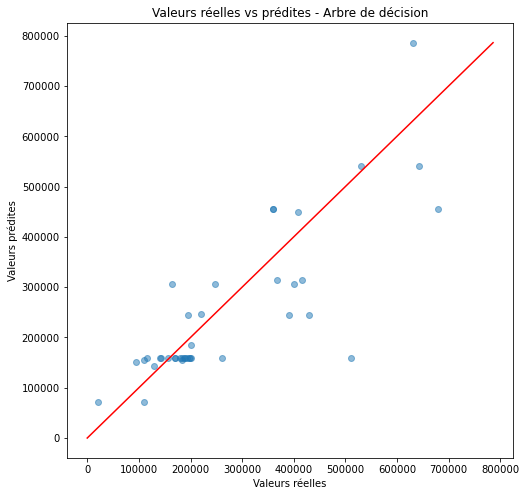

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Instanciation du modèle DecisionTreeRegressor avec une profondeur maximale de 5
tree_reg = DecisionTreeRegressor(max_depth=5)

# Entraînement du modèle sur les données d'entraînement
tree_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

# Affichage des résultats
print("RMSE: ", rmse)
print("R2 score: ", r2)

# Tracé du graphique de dispersion entre les valeurs réelles et prédites
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Ligne de la correspondance parfaite
plt.title('Valeurs réelles vs prédites - Arbre de décision')
plt.show()
